In [1]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import folium
from folium.plugins import HeatMap
import requests
from PIL import Image
from io import BytesIO

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rizky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
file_loc = r"https://raw.githubusercontent.com/rizkyyanuark/Sentiment-Analysis-KIPK-Recipients-based-Tweets-from-X/main/Dataset/Hasil%20Scraping.csv"
data_scrape = pd.read_csv(file_loc)
data_scrape

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1785300561094644037,Tue Apr 30 13:29:57 +0000 2024,0,selain kasus salah sasaran kipk ada jg yg dise...,1785300561094644037,NaN,NaN,in,NaN,0,0,0,https://twitter.com/jiegree/status/17853005610...,1344526407938916357,jiegree
1,1785300394010452166,Tue Apr 30 13:29:17 +0000 2024,0,Makin banyak yang ke spill yang kipk tapi tern...,1785300394010452166,NaN,NaN,in,Johnny,0,0,0,https://twitter.com/whosrahmah/status/17853003...,1187581909267701761,whosrahmah
2,1785253406166393056,Tue Apr 30 13:26:44 +0000 2024,0,@personality404_ the thing isss apakah that in...,1785299751065485367,NaN,personality404_,in,NaN,0,0,0,https://twitter.com/gagagagawrra/status/178529...,1662451301547118592,gagagagawrra
3,1785299607414886693,Tue Apr 30 13:26:10 +0000 2024,0,Banyak amat kipk salah sasaran inimah yg salah...,1785299607414886693,NaN,NaN,in,♡,0,0,0,https://twitter.com/samohaec/status/1785299607...,1734519974390317056,samohaec
4,1785270395622539737,Tue Apr 30 13:24:13 +0000 2024,0,@boomboomna @undipmenfess ini undip bnyk bener...,1785299116396102054,NaN,boomboomna,in,NaN,0,1,0,https://twitter.com/Nazifamulya/status/1785299...,1160811689937235968,Nazifamulya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,1784890813501391093,Mon Apr 29 10:41:01 +0000 2024,0,@markfsoul mmf zan tapi aku bukan penerima kip...,1784895657053913391,NaN,markfsoul,in,Jakarta Selatan,0,1,0,https://twitter.com/ssenabluu/status/178489565...,2397505423,ssenabluu
4027,1328338212721311746,Mon Apr 29 10:40:46 +0000 2024,1,@digidegu Ohhh gini kelakukan penerima KIPK go...,1784895594584031590,NaN,digidegu,in,NaN,1,1,0,https://twitter.com/if_amall/status/1784895594...,1668011559547961344,if_amall
4028,1784895346692554790,Mon Apr 29 10:39:47 +0000 2024,0,Itu penerima kipk di kuliti habis2an sampe dia...,1784895346692554790,NaN,NaN,in,NaN,0,0,0,https://twitter.com/PMunceri/status/1784895346...,1784001049818505216,PMunceri
4029,1784895317474730334,Mon Apr 29 10:39:40 +0000 2024,0,Penerima kipk kan dah ada indikatornya ya... k...,1784895317474730334,NaN,NaN,in,NaN,0,1,0,https://twitter.com/ncddream/status/1784895317...,814624634498752512,ncddream


In [5]:
data_scrape = data_scrape[['created_at', 'full_text','username']].rename(columns={'created_at': 'date', 'full_text': 'tweet'}).drop_duplicates()
data_scrape

,date,tweet,username
0,Tue Apr 30 13:29:57 +0000 2024,selain kasus salah sasaran kipk ada jg yg dise...,jiegree
1,Tue Apr 30 13:29:17 +0000 2024,Makin banyak yang ke spill yang kipk tapi tern...,whosrahmah
2,Tue Apr 30 13:26:44 +0000 2024,@personality404_ the thing isss apakah that in...,gagagagawrra
3,Tue Apr 30 13:26:10 +0000 2024,Banyak amat kipk salah sasaran inimah yg salah...,samohaec
4,Tue Apr 30 13:24:13 +0000 2024,@boomboomna @undipmenfess ini undip bnyk bener...,Nazifamulya
...,...,...,...
4026,Mon Apr 29 10:41:01 +0000 2024,@markfsoul mmf zan tapi aku bukan penerima kip...,ssenabluu
4027,Mon Apr 29 10:40:46 +0000 2024,@digidegu Ohhh gini kelakukan penerima KIPK go...,if_amall
4028,Mon Apr 29 10:39:47 +0000 2024,Itu penerima kipk di kuliti habis2an sampe dia...,PMunceri
4029,Mon Apr 29 10:39:40 +0000 2024,Penerima kipk kan dah ada indikatornya ya... k...,ncddream


In [6]:
# Menghapus baris yang mengandung nilai NaN
data_scrape_clean = data_scrape.dropna()

# Menghitung jumlah tweet setelah penghapusan NaN
jumlah_tweet_clean = data_scrape_clean["tweet"].count()
print(f"Jumlah tweet setelah menghapus NaN: {jumlah_tweet_clean}")

# Menghitung jumlah data NaN setelah penghapusan, seharusnya 0
jumlah_nan_clean = data_scrape_clean.isnull().sum().sum()
print(f"Jumlah data NaN setelah penghapusan: {jumlah_nan_clean}")

Jumlah tweet setelah menghapus NaN: 3938
Jumlah data NaN setelah penghapusan: 0


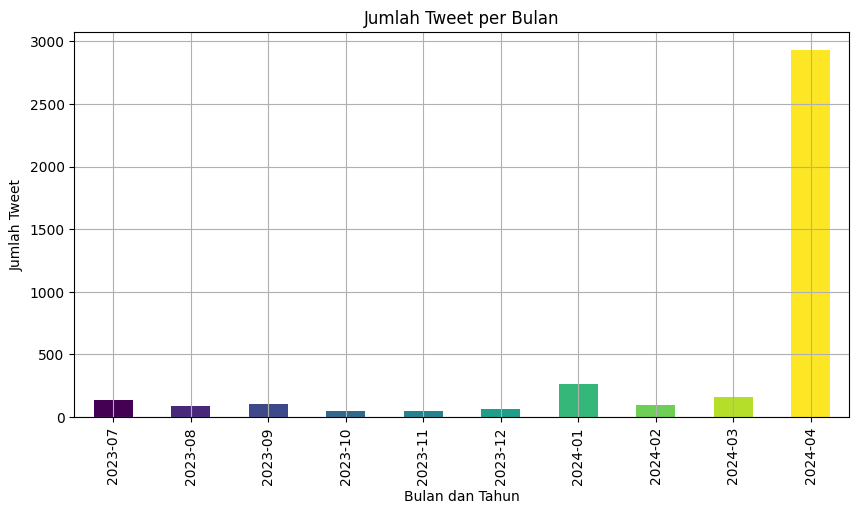

In [7]:
tweets = data_scrape.copy()
tweets['date'] = pd.to_datetime(tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')
tweets['YearMonth'] = tweets['date'].dt.to_period('M')
monthly_tweets = tweets.groupby('YearMonth').size()
colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_tweets)))
monthly_tweets.plot(kind='bar', figsize=(10, 5), color=colors)
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Tweet")
plt.title("Jumlah Tweet per Bulan")
plt.grid(True)
plt.show()


In [8]:
stopword_bahasa = pd.read_csv('https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/TextNormalization/stopwordbahasa.csv', encoding='latin-1')
stopword_bahasa = stopword_bahasa.rename(columns={0: 'stop'})
# stopword_bahasa.head()

kamus_alay = pd.read_csv('https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/TextNormalization/kamus_alay.csv', header=None, encoding='latin-1')
kamus_alay = kamus_alay.rename(columns={0: 'original',
                                     1: 'replacement'})
kamus_alay_map = dict(zip(kamus_alay['original'], kamus_alay['replacement']))
# kamus_alay.head()

kamus_singkatan = pd.read_csv('https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/TextNormalization/kamus_singkatan.csv', sep=';', encoding='latin-1')
kamus_singkatan.columns = ['Column1', 'Column2']
kamus_singkatan = kamus_singkatan.rename(columns={'Column1': 'original', 'Column2': 'replacement'})
kamus_singkatan_map = dict(zip(kamus_singkatan['original'], kamus_singkatan['replacement']))
# kamus_singkatan.head()

In [24]:
# URL langsung ke file Excel di OneDrive
url = 'https://onedrive.live.com/download?cid=87800D9176D9AB3B&resid=87800D9176D9AB3B%2138059&authkey=%21AEiLURQ1anJ3daY'
info_univ = pd.read_excel(url, engine='openpyxl')['Singkatan'].tolist()
universitas_info = pd.read_excel(url, engine='openpyxl')
# Fungsi untuk menghapus mention di Twitter
# def hapus_tag(text):
#     return re.sub(r'@\w+', '', text)

# Fungsi untuk menghapus tautan, mention, dan hashtag di Twitter
def remove_links(text):
    text = text.lower()
    url_regex = r"https?://\S+"
    clean_text = re.sub(url_regex, " ", text)
    clean_text = re.sub(r'\[.*?\]', '', clean_text)
    clean_text = re.sub(r'#\w+', '', clean_text)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

# Fungsi untuk menghapus angka
def hapus_angka(text):
    return re.sub(r"\d+", "", text)

def clean_punct(text):
    clean_spcl = re.compile('[/(){}\[\]\|,;]')
    clean_symbol = re.compile('[^0-9a-z]')
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove usernames that are not in the exclusion list
    for username in re.findall(r'@[A-Za-z0-9_]+', text):
        username_clean = username[1:]  # Remove the '@' symbol
        if username_clean not in info_univ:
            text = text.replace(username, ' ')
    return text


# Fungsi utama untuk melakukan semua pembersihan teks
def preprocess_text(text):
    # text = hapus_tag(text)
    text = remove_links(text)
    text = hapus_angka(text)
    text = clean_punct(text)
    return text
# Terapkan fungsi preprocessing ke kolom 'text'
data_scrape['cleaning'] = data_scrape['tweet'].apply(preprocess_text)
data_scrape.to_csv('testData.csv', index=False)

In [25]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# Text preprocessing functions from previous script
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def normalize_alay(text):
    return ' '.join([kamus_alay_map[word] if word in kamus_alay_map else word for word in text.split(' ')])

def normalize_singkatan(text):
    return ' '.join([kamus_singkatan_map[word] if word in kamus_singkatan_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join([ ' ' if word in stopword_bahasa.ada.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []  
    for w in text_cleaning:
        dt = stemmer.stem(w) 
        do.append(dt)
    return ' '.join(do)

# Modified clean_text function that calls preprocessing functions from previous script
def preprocess(text):

    text = normalize_alay(text) # Normalize text using alay_dict_map
    text = normalize_singkatan(text) # Normalize text using alay_dict_map2
    text = remove_stopword(text) # Remove stopwords from text
    text = tokenizingText(text)
    text = stemming(text)
    return text
data_scrape['preprocessing'] = data_scrape['cleaning'].apply(preprocess)
data_scrape

KeyboardInterrupt: 

In [14]:
from keras.models import load_model
# Define constants
num_words = 5000
sentiment_classes = ['Negative', 'Neutral', 'Positive']

# Load the pre-trained model
model = load_model(r'C:\Users\rizky\OneDrive\Dokumen\GitHub\Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X\best_model.h5')

In [61]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=num_words, oov_token='OOV')
tokenizer.fit_on_texts(data_scrape['preprocessing'])

# Transform the tweets to sequences
sequences = tokenizer.texts_to_sequences(data_scrape['preprocessing'])

# Pad the sequences with max_len = 49
padded_sequences = pad_sequences(sequences, maxlen=49, padding='post')

In [62]:
# Fungsi untuk mencocokkan singkatan dan mengisi kolom baru
def update_university_info(row, universitas_info):
    for _, uni_row in universitas_info.iterrows():
        if pd.notna(row['preprocessing']) and uni_row['Singkatan'] in row['preprocessing']:
            return pd.Series([uni_row['Nama Universitas'], uni_row['longitude'], uni_row['latitude']])
    return pd.Series([pd.NA, pd.NA, pd.NA])

# Terapkan fungsi ke data_scrape
data_scrape[['Nama Universitas', 'longitude', 'latitude']] = data_scrape.apply(update_university_info, axis=1, universitas_info=universitas_info)

# Lanjutkan dengan proses prediksi sentimen
predictions = model.predict(padded_sequences).argmax(axis=1)
predicted_labels = [sentiment_classes[prediction] for prediction in predictions]
data_scrape['label'] = predicted_labels

# Tampilkan DataFrame yang telah diperbarui
data_scrape

124/124 [==============================] - 2s 11ms/step


,date,tweet,username,cleaning,preprocessing,Nama Universitas,longitude,latitude,label
0,Tue Apr 30 13:29:57 +0000 2024,selain kasus salah sasaran kipk ada jg yg dise...,jiegree,selain kasus salah sasaran kipk ada jg yg dise...,salah sasar kipk ada program keluarga harap pa...,<NA>,<NA>,<NA>,Negative
1,Tue Apr 30 13:29:17 +0000 2024,Makin banyak yang ke spill yang kipk tapi tern...,whosrahmah,makin banyak yang ke spill yang kipk tapi tern...,spill kipk hidup boros alias salah sasar kasih...,<NA>,<NA>,<NA>,Negative
2,Tue Apr 30 13:26:44 +0000 2024,@personality404_ the thing isss apakah that in...,gagagagawrra,personality404 the thing isss apakah that inf...,personality404 the thing isss that influencer ...,<NA>,<NA>,<NA>,Negative
3,Tue Apr 30 13:26:10 +0000 2024,Banyak amat kipk salah sasaran inimah yg salah...,samohaec,banyak amat kipk salah sasaran inimah yg salah...,kipk salah sasar inimah salah seleksi kipk nya...,<NA>,<NA>,<NA>,Negative
4,Tue Apr 30 13:24:13 +0000 2024,@boomboomna @undipmenfess ini undip bnyk bener...,Nazifamulya,boomboomna undipmenfess ini undip bnyk bener ...,boomboomna undipmenfess undip tahi jadi kipk s...,Universitas Diponegoro,110.440107,-7.04837,Positive
...,...,...,...,...,...,...,...,...,...
4026,Mon Apr 29 10:41:01 +0000 2024,@markfsoul mmf zan tapi aku bukan penerima kip...,ssenabluu,markfsoul mmf zan tapi aku bukan penerima kip...,markfsoul mmf zan terima kipk ukt 8jt ter seok...,<NA>,<NA>,<NA>,Positive
4027,Mon Apr 29 10:40:46 +0000 2024,@digidegu Ohhh gini kelakukan penerima KIPK go...,if_amall,digidegu ohhh gini kelakukan penerima kipk go...,digidegu ohhh laku terima kipk goblok pembokep,<NA>,<NA>,<NA>,Negative
4028,Mon Apr 29 10:39:47 +0000 2024,Itu penerima kipk di kuliti habis2an sampe dia...,PMunceri,itu penerima kipk di kuliti habis2an sampe dia...,terima kipk kulit habis2an rep base friends wi...,<NA>,<NA>,<NA>,Positive
4029,Mon Apr 29 10:39:40 +0000 2024,Penerima kipk kan dah ada indikatornya ya... k...,ncddream,penerima kipk kan dah ada indikatornya ya kalo...,terima kipk ada indikator ya rasa anak sesuai ...,<NA>,<NA>,<NA>,Negative


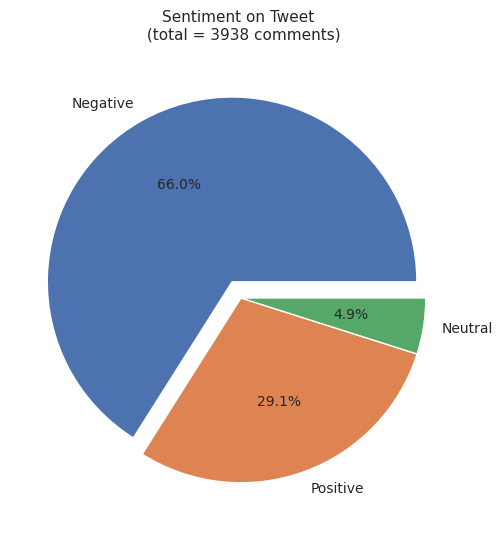

In [63]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data_scrape['label'].value_counts()]
labels = list(data_scrape['label'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment on Tweet \n (total = 3938 comments)', fontsize = 11, pad = 20)
plt.show()

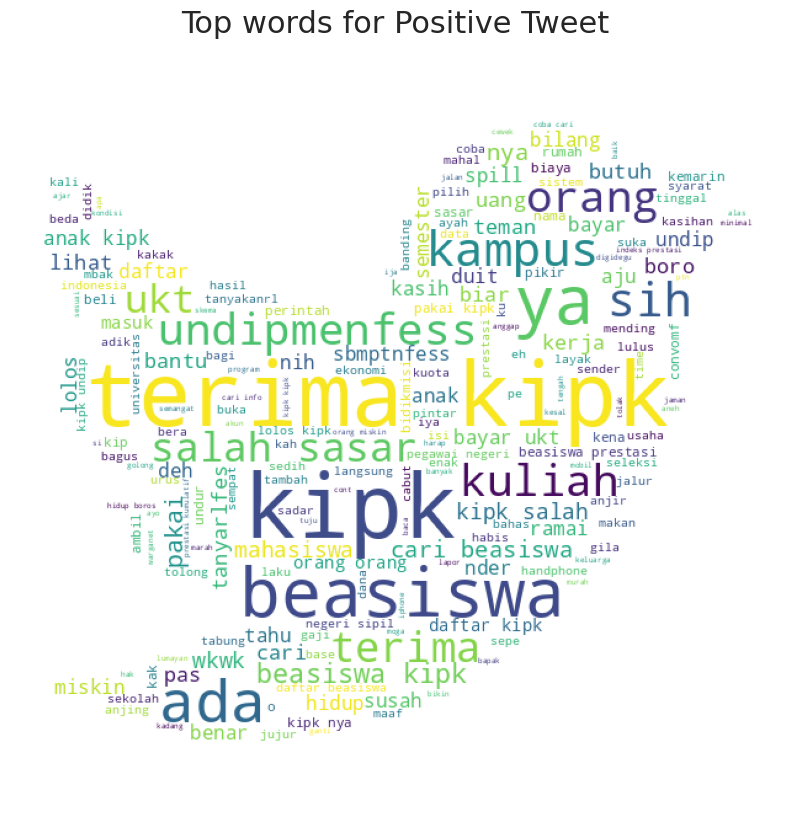

In [64]:
# Ambil gambar dari URL untuk digunakan sebagai mask
url = "https://image.freepik.com/free-icon/twitter-logo_318-40459.jpg"
response = requests.get(url)
twitter_mask = np.array(Image.open(BytesIO(response.content)))
# Buat WordCloud
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
# Generate WordCloud dari teks positif
wc.generate(' '.join(text for text in data_scrape.loc[data_scrape['label'] == 'Positive', 'preprocessing']))
# Tampilkan WordCloud
plt.figure(figsize=(18,10))
plt.title('Top words for Positive Tweet', fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

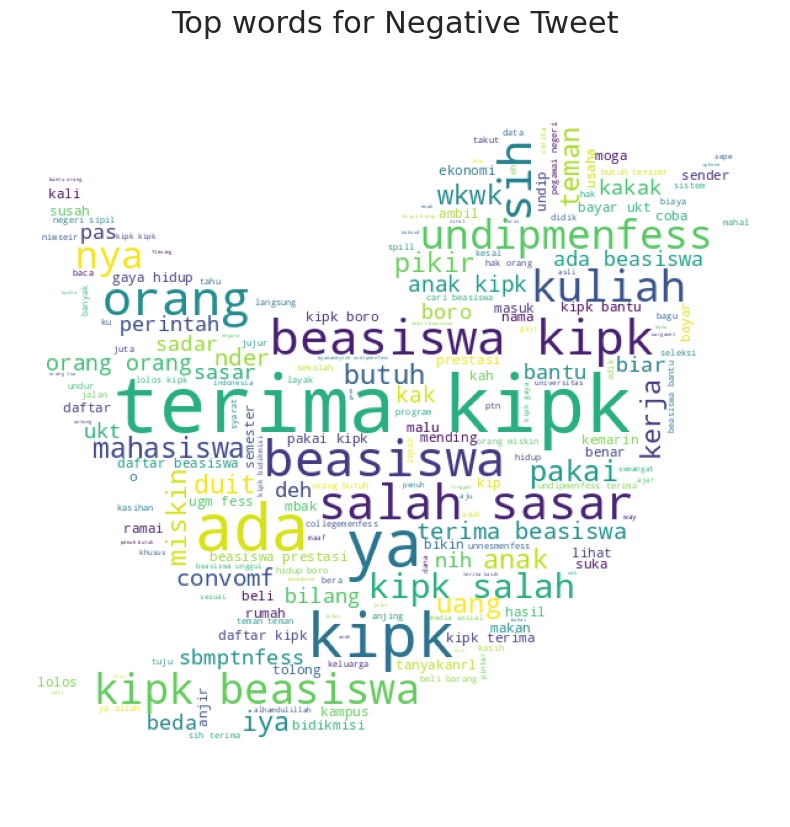

In [65]:
# Buat WordCloud
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)

# Generate WordCloud dari teks positif
wc.generate(' '.join(text for text in data_scrape.loc[data_scrape['label'] == 'Negative', 'preprocessing']))

# Tampilkan WordCloud
plt.figure(figsize=(18,10))
plt.title('Top words for Negative Tweet', fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

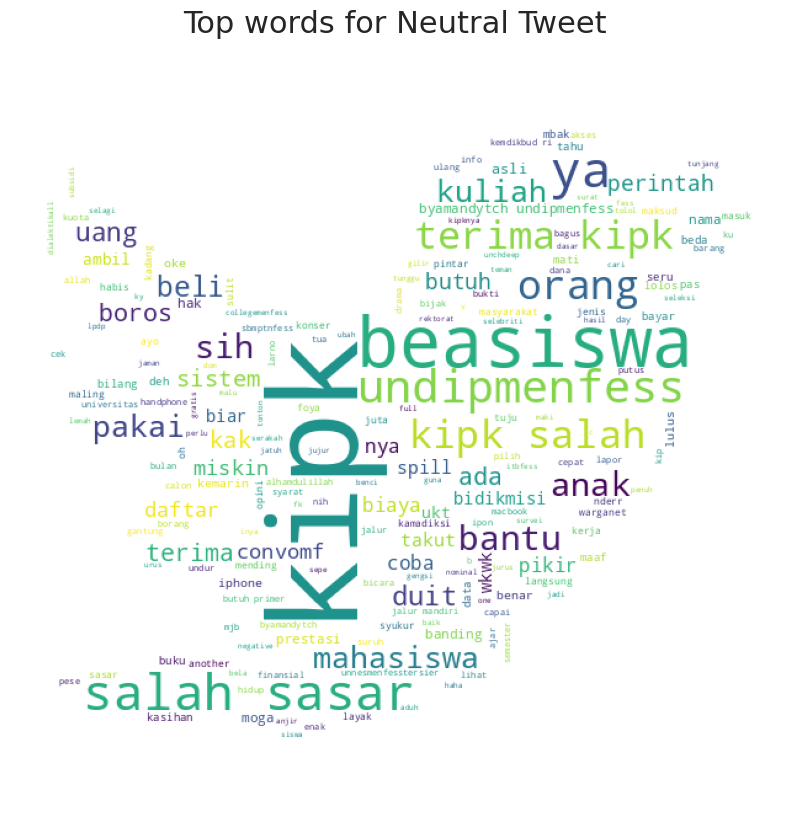

In [66]:
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_scrape.loc[data_scrape['label'] == 'Neutral', 'preprocessing']))
plt.figure(figsize=(18,10))
plt.title('Top words for Neutral Tweet',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [67]:
# Filter hanya data dengan label negatif
negative_data = data_scrape[data_scrape['label'] == 'Negative']

# Menghitung jumlah kemunculan setiap lokasi untuk data dengan label negatif
location_counts = negative_data.groupby(['latitude', 'longitude']).size().reset_index(name='count')

# Membuat peta dengan folium
map = folium.Map(location=[negative_data['latitude'].mean(), negative_data['longitude'].mean()], zoom_start=5)

# Membuat HeatMap dengan tingkat kepopuleran untuk data dengan label negatif
heat_data = [[row['latitude'], row['longitude'], row['count']] for index, row in location_counts.iterrows()]
HeatMap(heat_data, radius=15, blur=20).add_to(map)

map

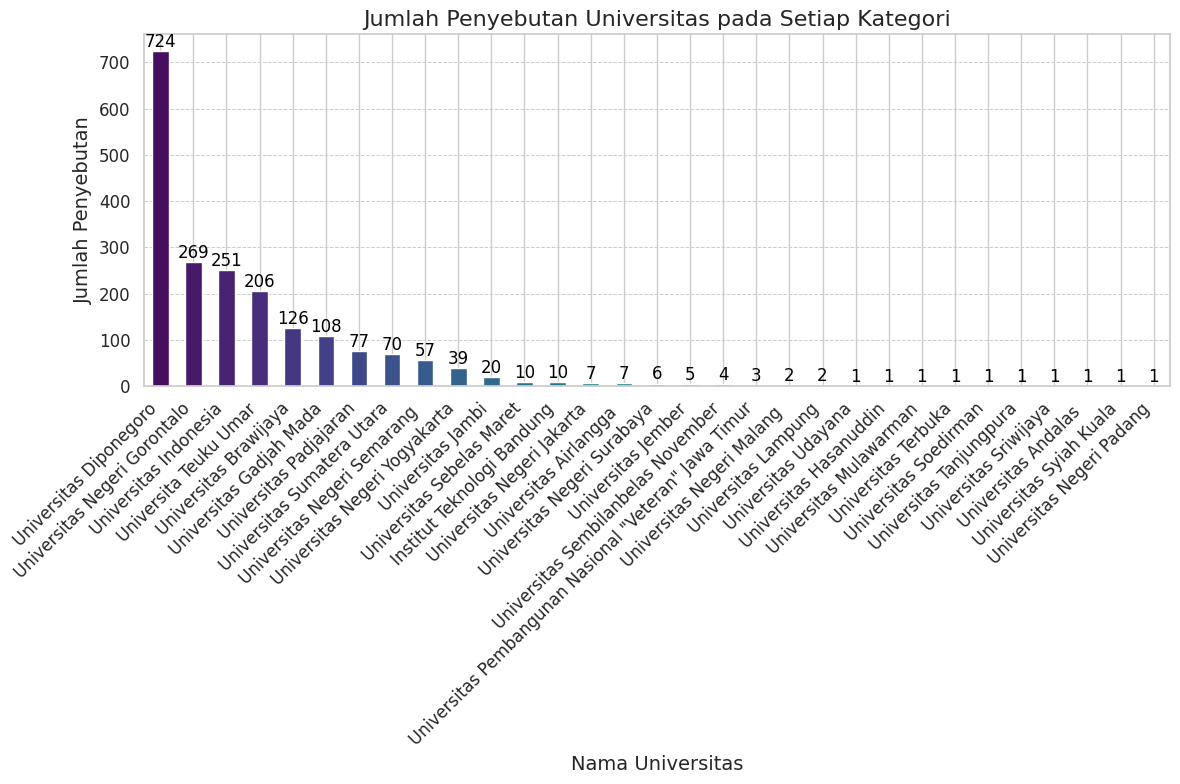

In [68]:
# Menggunakan seaborn untuk mengatur gaya visual
sns.set(style="whitegrid")

# Anggaplah Anda sudah memiliki DataFrame `data_scrape` yang berisi kolom 'Nama Universitas'

# Menghitung jumlah universitas yang disebutkan dalam data
label_counts = data_scrape['Nama Universitas'].value_counts()

# Membuat figure dan axes
plt.figure(figsize=(12, 8))
bars = label_counts.plot(kind='bar', color=sns.color_palette("viridis", len(label_counts)))

# Menambahkan judul dan label sumbu
plt.title('Jumlah Penyebutan Universitas pada Setiap Kategori', fontsize=16)
plt.xlabel('Nama Universitas', fontsize=14)
plt.ylabel('Jumlah Penyebutan', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# Menambahkan grid
plt.grid(axis='y', linestyle='--', linewidth=0.7)
# Menambahkan label jumlah di atas setiap batang
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=12, color='black')

# Menambahkan layout yang rapi
plt.tight_layout()
# Menampilkan plot
plt.show()

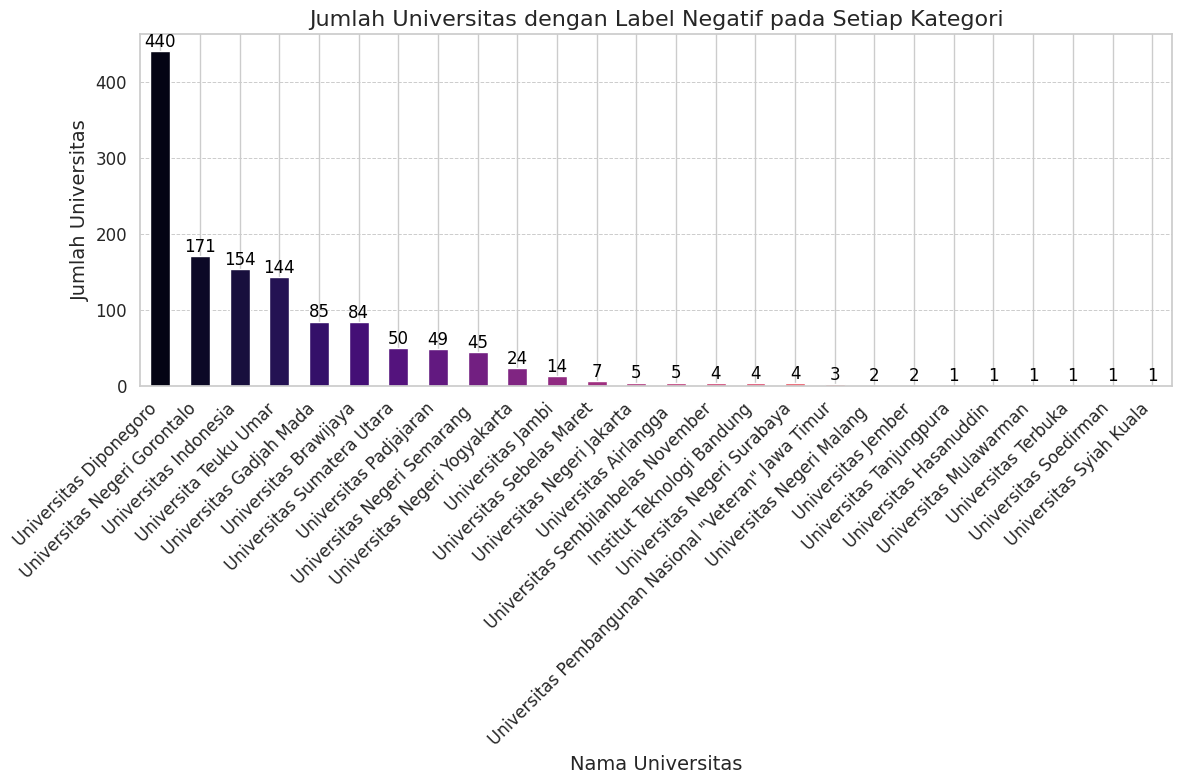

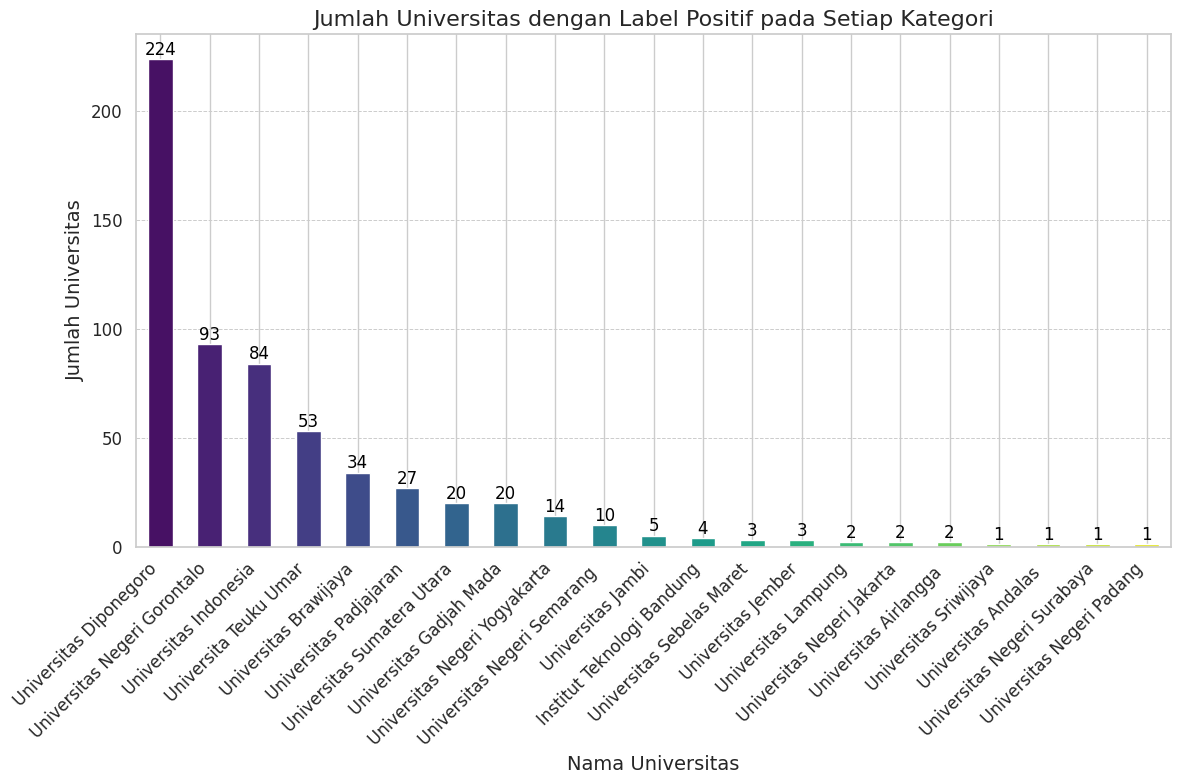

In [69]:
# Menggunakan seaborn untuk mengatur gaya visual
sns.set(style="whitegrid")

# Anggaplah Anda sudah memiliki DataFrame `data_scrape` yang berisi kolom 'label' dan 'Nama Universitas'

# Filter hanya data dengan label negatif
negative_data = data_scrape[data_scrape['label'] == 'Negative']
positive_data = data_scrape[data_scrape['label'] == 'Positive']

# Menghitung jumlah universitas dengan label negatif untuk setiap kategori
negative_label_counts = negative_data['Nama Universitas'].value_counts()
positive_label_counts = positive_data['Nama Universitas'].value_counts()

# Plot diagram batang untuk label negatif
plt.figure(figsize=(12, 8))
bars_negative = negative_label_counts.plot(kind='bar', color=sns.color_palette("magma", len(negative_label_counts)))
plt.title('Jumlah Universitas dengan Label Negatif pada Setiap Kategori', fontsize=16)
plt.xlabel('Nama Universitas', fontsize=14)
plt.ylabel('Jumlah Universitas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
for bar in bars_negative.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()
plt.show()

# Plot diagram batang untuk label positif
plt.figure(figsize=(12, 8))
bars_positive = positive_label_counts.plot(kind='bar', color=sns.color_palette("viridis", len(positive_label_counts)))
plt.title('Jumlah Universitas dengan Label Positif pada Setiap Kategori', fontsize=16)
plt.xlabel('Nama Universitas', fontsize=14)
plt.ylabel('Jumlah Universitas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
for bar in bars_positive.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=12, color='black')
plt.tight_layout()
plt.show()

In [70]:
from datetime import datetime

data = data_scrape[['date','tweet','preprocessing','username','Nama Universitas','label','latitude','longitude']]

# Fungsi untuk mengonversi format tanggal
def clean_date(date_str):
    # Konversi string ke objek datetime
    date_obj = datetime.strptime(date_str, '%a %b %d %H:%M:%S +0000 %Y')
    # Format ulang tanggal menjadi string yang lebih bersih
    clean_date_str = date_obj.strftime('%Y-%m-%d')
    # Format ulang waktu menjadi string terpisah
    clean_time_str = date_obj.strftime('%H:%M:%S')
    return clean_date_str, clean_time_str

data['geo'] = data.apply(lambda row: '{},{}'.format(row['latitude'], row['longitude']), axis=1)
# Memisahkan tanggal dan waktu
data['date'], data['time'] = zip(*data['date'].apply(clean_date))
data = data[['date','time','username','tweet','preprocessing','Nama Universitas','label','geo']]
data


,date,time,username,tweet,preprocessing,Nama Universitas,label,geo
0,2024-04-30,13:29:57,jiegree,selain kasus salah sasaran kipk ada jg yg dise...,salah sasar kipk ada program keluarga harap pa...,<NA>,Negative,"<NA>,<NA>"
1,2024-04-30,13:29:17,whosrahmah,Makin banyak yang ke spill yang kipk tapi tern...,spill kipk hidup boros alias salah sasar kasih...,<NA>,Negative,"<NA>,<NA>"
2,2024-04-30,13:26:44,gagagagawrra,@personality404_ the thing isss apakah that in...,personality404 the thing isss that influencer ...,<NA>,Negative,"<NA>,<NA>"
3,2024-04-30,13:26:10,samohaec,Banyak amat kipk salah sasaran inimah yg salah...,kipk salah sasar inimah salah seleksi kipk nya...,<NA>,Negative,"<NA>,<NA>"
4,2024-04-30,13:24:13,Nazifamulya,@boomboomna @undipmenfess ini undip bnyk bener...,boomboomna undipmenfess undip tahi jadi kipk s...,Universitas Diponegoro,Positive,"-7.0483698,110.440107056068"
...,...,...,...,...,...,...,...,...
4026,2024-04-29,10:41:01,ssenabluu,@markfsoul mmf zan tapi aku bukan penerima kip...,markfsoul mmf zan terima kipk ukt 8jt ter seok...,<NA>,Positive,"<NA>,<NA>"
4027,2024-04-29,10:40:46,if_amall,@digidegu Ohhh gini kelakukan penerima KIPK go...,digidegu ohhh laku terima kipk goblok pembokep,<NA>,Negative,"<NA>,<NA>"
4028,2024-04-29,10:39:47,PMunceri,Itu penerima kipk di kuliti habis2an sampe dia...,terima kipk kulit habis2an rep base friends wi...,<NA>,Positive,"<NA>,<NA>"
4029,2024-04-29,10:39:40,ncddream,Penerima kipk kan dah ada indikatornya ya... k...,terima kipk ada indikator ya rasa anak sesuai ...,<NA>,Negative,"<NA>,<NA>"


In [ ]:
data.to_csv('Predicted_Data.csv', index=False)